# Homework 04

### Homework

1. **Tokenization** 

Write a generic Python tokenizer, which takes a set of text lines and tabulates the different words (that is, the tokens will be simply English words), keeping track of the frequency of each word.  Use the guidance in the accompanying notebook, 'Homework_1.ipynb'.

2. **Embedding**

Modify the embedding visualization code above to zoom in on various regions of the projections, and identify at least one interesting cluster of tokens.

### 1. read words

In [1]:
import string
import re
from operator import itemgetter

wdict = {}
total_words = 0
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline() 
    nlines = 1
    while line:
        cleaned_line = re.sub(r'[^\x00-\x7F]', '', line)           # eliminate any Unicode
        line_low = cleaned_line.lower()                            # Convert to lowercase
        trans_table = str.maketrans('', '', string.punctuation)    # remove punctuation
        no_punctuation_text = line_low.translate(trans_table)
        words = no_punctuation_text.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
            total_words += 1
        line = L.readline()
        nlines += 1

### 2. sort words

In [2]:
from operator import itemgetter

# Sort the dictionary by its values
sorted_wdict = dict(sorted(wdict.items(), key=lambda item: item[1], reverse=True))

# the top 100 most frequent word tokens
nitem = 0 ; maxitems = 100
for item in sorted_wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break

('the', 9255)
('and', 5892)
('of', 4532)
('a', 4053)
('to', 3592)
('in', 2593)
('it', 2293)
('i', 2205)
('was', 2093)
('that', 1724)
('he', 1402)
('is', 1148)
('for', 1095)
('with', 1081)
('you', 1033)
('his', 961)
('had', 961)
('but', 952)
('on', 947)
('as', 881)
('this', 781)
('they', 758)
('at', 750)
('not', 722)
('all', 720)
('by', 713)
('one', 686)
('there', 627)
('were', 625)
('be', 617)
('my', 582)
('or', 581)
('from', 577)
('have', 571)
('out', 541)
('so', 536)
('up', 529)
('him', 523)
('we', 519)
('me', 516)
('when', 505)
('would', 478)
('which', 476)
('river', 457)
('an', 440)
('them', 425)
('no', 422)
('then', 405)
('said', 399)
('are', 387)
('if', 381)
('their', 378)
('now', 369)
('about', 346)
('time', 337)
('been', 335)
('down', 328)
('its', 323)
('could', 313)
('has', 305)
('will', 301)
('into', 300)
('what', 285)
('her', 278)
('two', 273)
('do', 271)
('other', 270)
('some', 269)
('man', 260)
('new', 259)
('any', 238)
('got', 234)
('these', 233)
('she', 233)
('who', 229)

#### Those are the  top 100 most frequent word tokens

In [3]:
# number of words
numberWords = len(wdict)

occurrence = 0
nitem = 0
for item in sorted_wdict.items():
    occurrence += item[1]
    # print(occurrence / total_words)
    if occurrence / total_words >= 0.9: break
    nitem += 1
print(f'Adding up {nitem} tokens  make up the top 90% of word occurrences!')


Adding up 3731 tokens  make up the top 90% of word occurrences!


### Embendding

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()
# This notebook assumes CPU execution. If you want to use GPUs, put the model on cuda and modify subsequent code blocks.
#model.to('cuda')
# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Save the BERT vocabulary to a file -- by default it will name this file "vocab.txt".
tokenizer.save_vocabulary(save_directory='Myhomework.txt')

numberWords = model.config.vocab_size

In [48]:
# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)


# Read in the vocabulary
filename = "Myhomework.txt"
with open(filename,'r') as f:
    bertwords = np.array([])
    for line in f:
        bertwords = np.append(bertwords, line.rstrip())

(30522, 1024)


14462

In [44]:
import random

num_compute = 10000
num_plot = 4000

# Determine vocabulary to use for t-SNE/visualization.
numbers = list(range(0, numberWords))
#select data to use
bert_char_indices_to_use = random.sample(numbers, num_compute)
bert_voc_indices_to_use = random.sample(numbers, num_compute)
#select data to plot
bert_voc_indices_to_plot = random.sample(bert_char_indices_to_use, num_plot)


bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_use)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]


print(len(bert_voc_indices_to_plot))
print(len(bert_voc_indices_to_use))

IndexError: index 18546 is out of bounds for axis 0 with size 14462

In [7]:
# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=12,verbose=2,metric='cosine',init='pca',n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 1.459s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.167843
[t-SNE] Computed conditional probabilities in 0.146s
[t-SNE] Iteration 50: error = 94.8694839, gradient norm = 0.0002592 (50 iterations in 1.857s)
[t-SNE] It

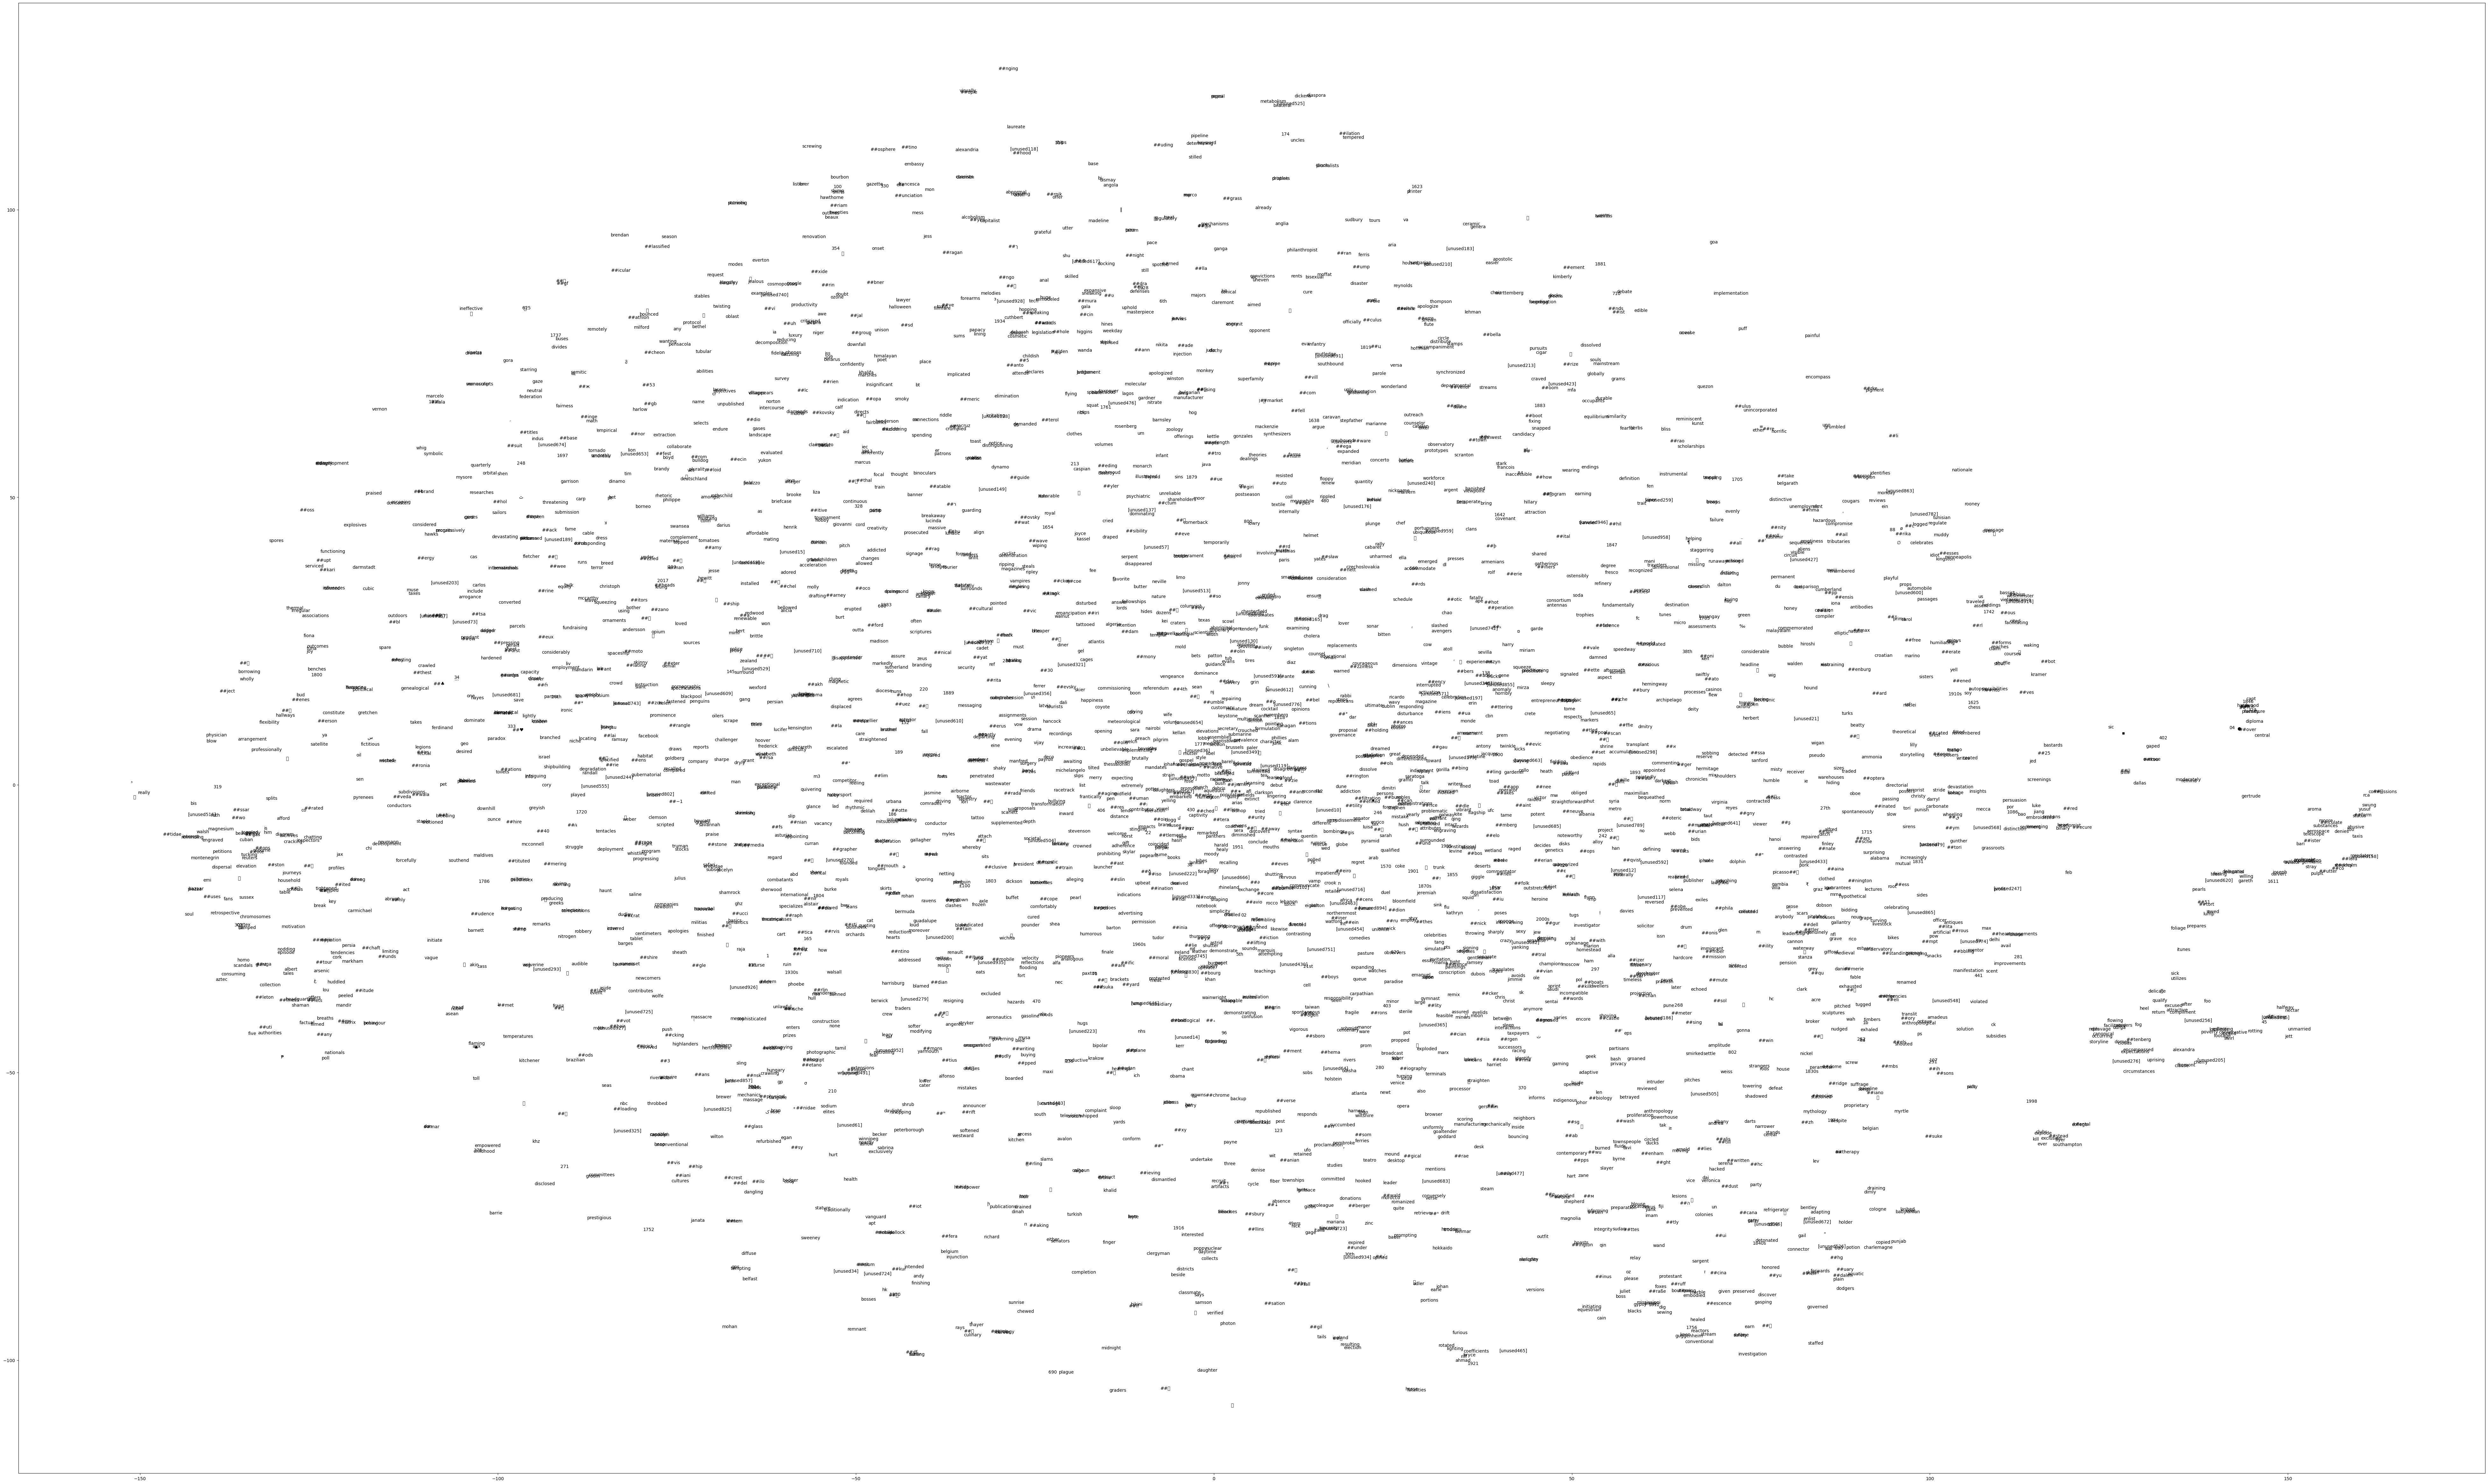

<Figure size 10000x6000 with 0 Axes>

In [12]:
# Plot the transformed BERT vocabulary embeddings:
plt.rcParams['font.family'] = 'DejaVu Sans'
fig = plt.figure()

for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
    plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt)
plt.show()
# Save the figure as a PDF file
plt.savefig('my_plot.pdf')

Due to language barriers, it is difficult to identify real correlations


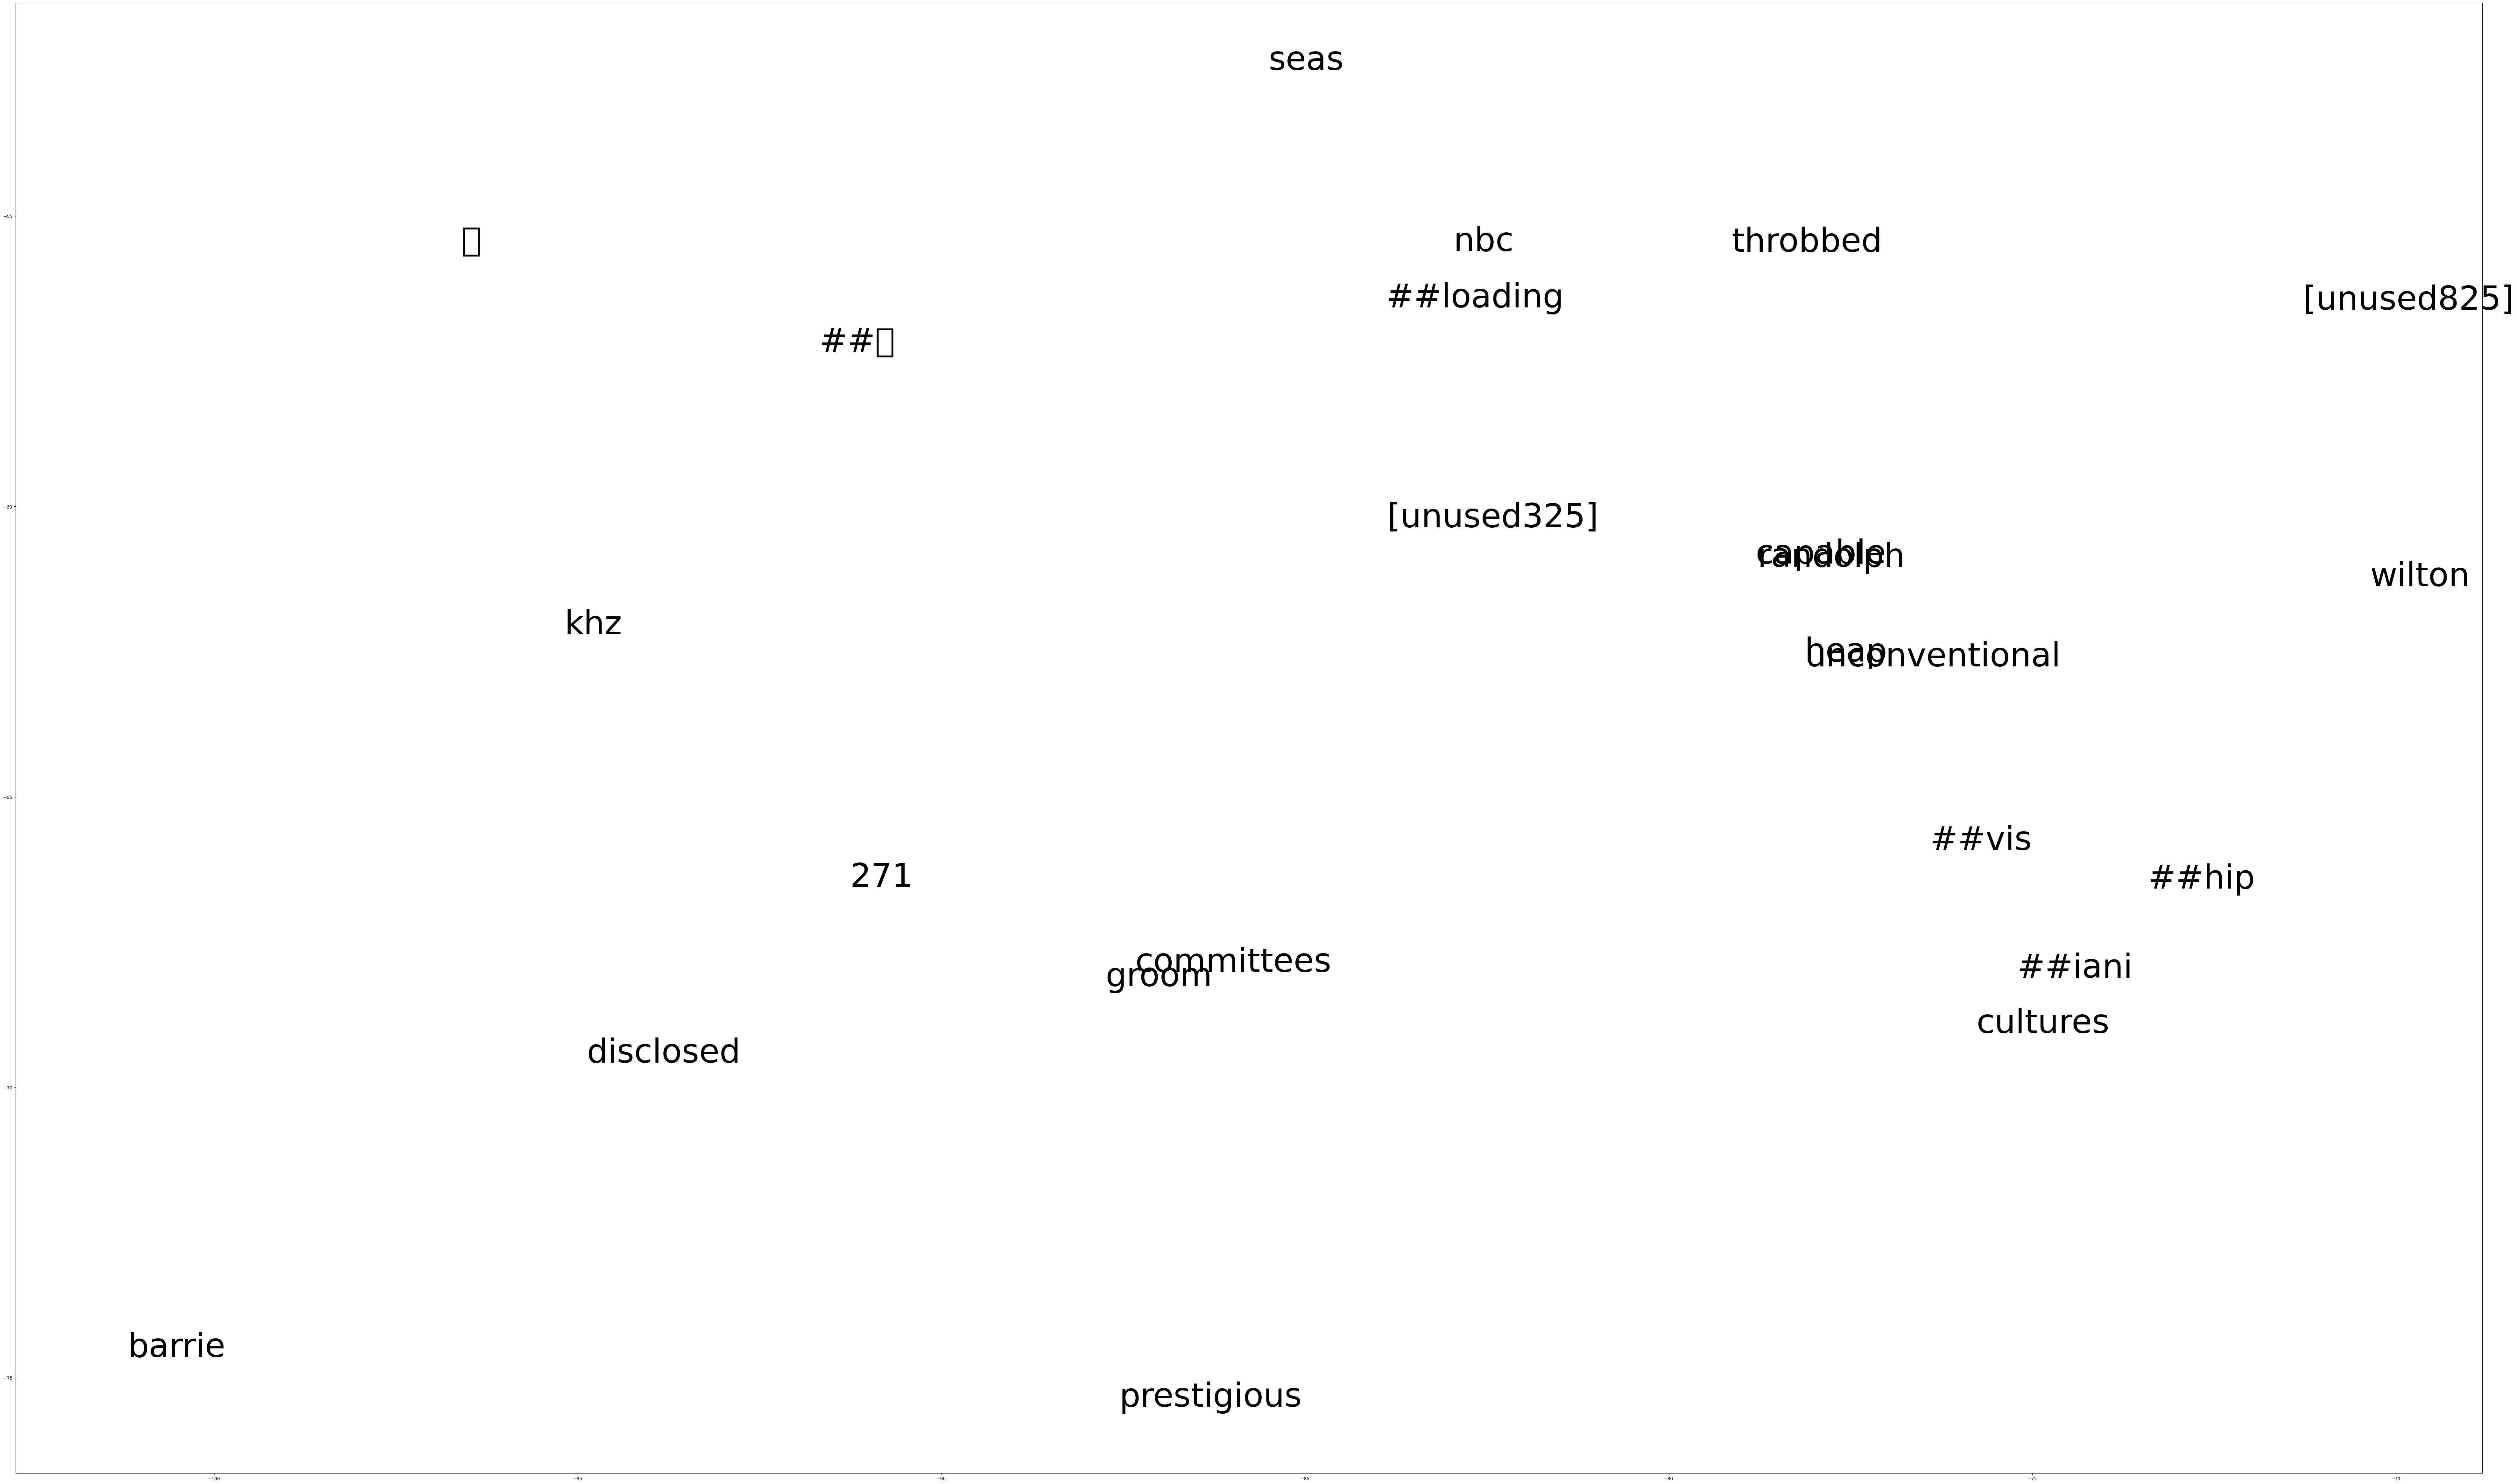

In [50]:
nplotted = len(bert_words_to_plot)

# Get the limits of the embedding region
x_left = np.min(bert_word_embs_to_use_tsne[:nplotted,0])
x_right = np.max(bert_word_embs_to_use_tsne[:nplotted,0])
y_left = np.min(bert_word_embs_to_use_tsne[:nplotted,1])
y_right = np.max(bert_word_embs_to_use_tsne[:nplotted,1])

# Width of embedding region
xwidth = x_right - x_left ; ywidth = y_right - y_left


def plotwindow(window_xfrac, window_yfrac, window_xoff, window_yoff):
    ## Bounds on window coordinates
    newxl_center = x_left + xwidth * window_xoff
    newxl_left = newxl_center - 0.5*window_xfrac * xwidth
    newxl_right =  newxl_center + 0.5*window_xfrac * xwidth

    newyl_center = y_left + ywidth * window_yoff
    newyl_left = newyl_center - 0.5*window_yfrac * ywidth
    newyl_right =  newyl_center + 0.5*window_yfrac * ywidth

    # Make arrays including only words inside the requested window, using numpy
    # logical indexing
    nplotted = len(bert_words_to_plot)
    x_inds_r = bert_word_embs_to_use_tsne[:nplotted,0] < newxl_right 
    x_inds_l = bert_word_embs_to_use_tsne[:nplotted,0] > newxl_left
    x_inds = np.logical_and(x_inds_l, x_inds_r)

    y_inds_r = bert_word_embs_to_use_tsne[:nplotted,1] < newyl_right
    y_inds_l = bert_word_embs_to_use_tsne[:nplotted,1] > newyl_left
    y_inds = np.logical_and(y_inds_l, y_inds_r)

    inds = np.logical_and(x_inds, y_inds)

    # Index the word and embedding arrays by the window-restricted indices
    bwtp = bert_words_to_plot[inds]
    bwembs = bert_word_embs_to_use_tsne[:nplotted,:][inds,:]

    # Plot away
    for i, txt in enumerate(bwtp):
        plt.scatter(bwembs[i,0], bwembs[i,1], s=0)
        plt.text(bwembs[i,0], bwembs[i,1], txt, family='sans-serif', size=75)

    plt.show()

window_xfrac = 0.1 ; window_yfrac = 0.1
window_xoff = 0.21 ; window_yoff = 0.19
## Place names
print("Due to language barriers, it is difficult to identify real correlations")
plotwindow(window_xfrac, window_yfrac, window_xoff, window_yoff)